# 01 - City blocks regularity
### Based on 'A typology of street patterns' (Barthélemy M. and Louf R., 2014)
The form factor of a block is defined as "the ratio between the area of the block and the area of the circumscribed circle C". However to generate a 'fingerprint' by which cities can be classified we "need to combine the information about both the shape and the area."

This is also based on gross urban blocks generated from OpenStreetMap's highway network.

By binning the blocks' form factors they categorize zones within a city.

In [1]:
import sys
sys.path.append('..')

from osmuf.core import *

In [2]:
# dictionary of places of interest for convenience, 
places = {'posadas' : (-27.37577,-55.90059),
          'kaduna' : (10.53364, 7.37360),
          'buenos_aires' : (-34.5798,-58.4422), #57897,44013
          'margery_street' : (51.5266,-0.1109),
          'welwyn_garden_city': (51.7938,-0.18645)}

In [3]:
place='margery_street'
point=places[place]
distance=500 # in meters

In [4]:
city_blocks, city_blocks_gross, city_blocks_gross_raw = city_blocks_from_point(point, distance)

In [5]:
circle_gdf=gdf_circlizer(city_blocks)

In [6]:
circle_gdf.head()

,area_net_ha,geometry,centroid,area_sec_ha,regularity
block_id,,,,,
185672811,0.183726,"POLYGON ((700591.1614390231 5712430.266350209,...",POINT (700558.7866038911 5712435.272230027),0.399536,0.459850
203295774,0.091806,"POLYGON ((700825.3164191942 5712396.435557038,...",POINT (700789.9916037653 5712395.45235968),0.251025,0.365724
645147771,0.319997,"POLYGON ((700505.2371168169 5712453.432594568,...",POINT (700463.9273980622 5712452.268275114),0.566692,0.564675
645290029,0.213102,"POLYGON ((700438.1890283119 5712397.254118733,...",POINT (700399.9617212163 5712397.526742365),0.452054,0.471409
645290030,0.311469,"POLYGON ((700533.4076978512 5712325.539108582,...",POINT (700478.6463418391 5712320.532578685),0.824843,0.377610


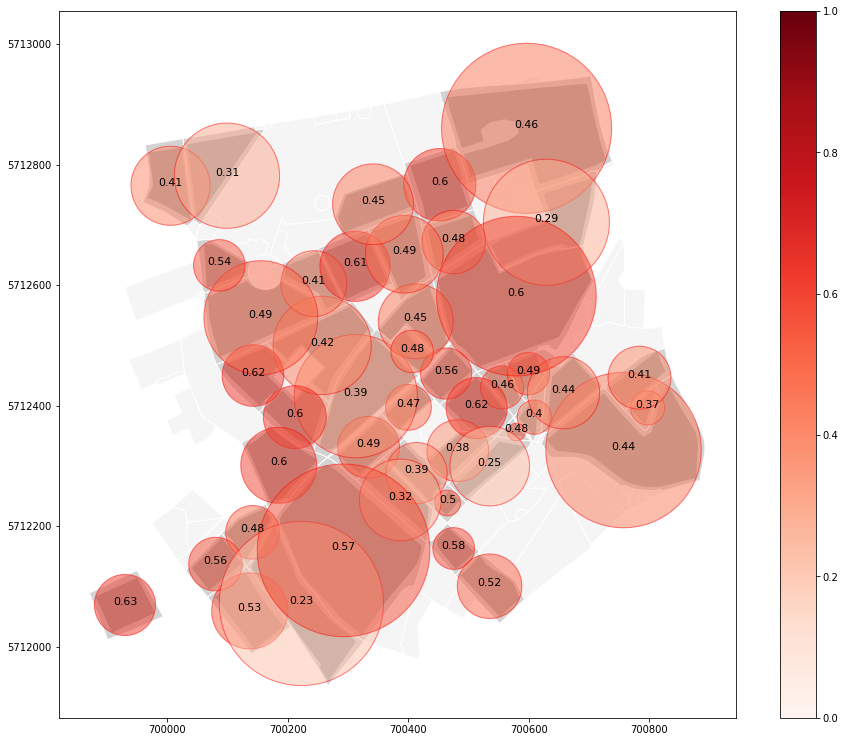

In [7]:
ax = city_blocks_gross_raw.plot(color='whitesmoke', edgecolor='white', figsize=(16,13));

city_blocks_gross.plot(ax=ax, color='lightgrey',edgecolor='white', alpha=1);

city_blocks.plot(ax=ax, color='darkgrey', alpha=1);

circle_gdf.plot(ax=ax,
                edgecolor='red',
                column='regularity',
                cmap='Reds',
                vmin=0,
                vmax=1,
                alpha=0.5,
                legend=True)

# label style
style = dict(size=11, color='black', horizontalalignment='center')

# show areas of gross city blocks
for idx, row in circle_gdf.iterrows():
    label = round(row.regularity, 2)
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, label, **style)

"The distributions of F displays important differences from one city to another, and a first naive idea would be to classify cities according to the distribution of block shapes given by P(F). The shape itself is however not enough to account for visual similarities and dissimilarities between street patterns." (Barthélemy M. and Louf R., 2014)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4fa566630>]],
      dtype=object)

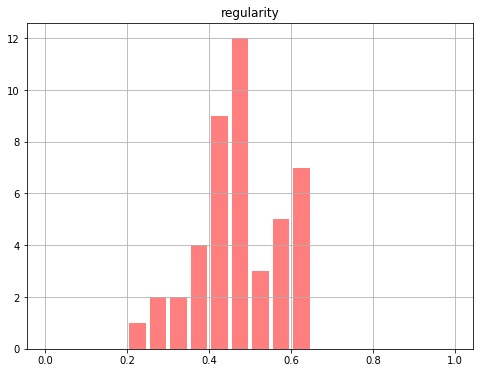

In [8]:
circle_gdf.hist(figsize=(8,6), column=['regularity'], bins=20, color='Red', alpha=0.5, rwidth=0.8, range=(0,1))